In [1]:
#https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d

In [6]:
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Merge,Flatten,Dropout
from keras.layers import Conv1D,Reshape
import keras

# For the plots 
import matplotlib.pyplot as plt

# For controlling the training parameters in the midst of training itself
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# For creating directory to save the models
import os
from imblearn.over_sampling import SMOTE

from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical   


import turicreate as tc


In [7]:
# Load the data
X = np.load("X (1).npy")
Y = np.load("Y (1).npy")

YY = []
for s in Y:
    YY.append(int(np.floor(s/3)))
    
Y = YY

# XT = np.column_stack( (X,Y) )
YT = []
for y in Y:
    if y ==0:
        YT.append(0)
    elif y>=1 and y<=20:
        YT.append(1)
    else:
        YT.append(2)
        
YT = np.array(YT)

In [8]:
import collections
counter=collections.Counter(Y)
print(counter)

Counter({0: 2818, 1: 92, 2: 64, 3: 40, 7: 26, 6: 23, 4: 22, 5: 21, 9: 18, 8: 14, 13: 13, 10: 13, 11: 13, 12: 9, 19: 7, 14: 6, 17: 6, 20: 5, 15: 5, 18: 5, 16: 5, 47: 2, 31: 2, 21: 2, 36: 1, 52: 1, 57: 1, 61: 1, 63: 1, 66: 1, 34: 1, 27: 1, 53: 1, 28: 1, 33: 1, 30: 1, 23: 1, 25: 1, 39: 1, 22: 1, 32: 1})


In [9]:
SY =  tc.SArray(Y)
SY.show()

Materializing SArray...

Done.

# Stage 1: Binary Classifier

In [10]:
sm = SMOTE(random_state=12, ratio = 'minority', k_neighbors = 5)
SynX, SynY = sm.fit_sample(X, YT)

In [11]:
# Load the data
syndataY =  tc.SArray(SynY)
syndataX = tc.SArray(SynX.tolist())


syndata = tc.SFrame()
syndata = syndata.add_column(syndataX,'X')
syndata = syndata.add_column(syndataY,'Soluble')
# Make a train-test split
syntrain_data, syntest_data = syndata.random_split(0.8)


dataY =  tc.SArray(YT)
dataX = tc.SArray(X.tolist())
data = tc.SFrame()
data = data.add_column(dataX,'X')
data = data.add_column(dataY,'Soluble')
# Make a train-test split
train_data, test_data = data.random_split(0.8)

stage1_binary_model = tc.classifier.create(syntrain_data, target='Soluble',
                             features = ['X'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4588

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 101

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.250093     | 0.941805          | 0.893519            | 0.767042          | 0.795102            |

| 2         | 0.498117     | 0.946382          | 0.912037            | 0.572600          | 0.619603            |

| 3         | 0.665178     | 0.950959          | 0.912037            | 0.440682          | 0.507501            |

| 4         | 0.836260     | 0.955100          | 0.912037            | 0.347105          | 0.434618            |

| 5         | 1.011097     | 0.961639          | 0.907407            | 0.280069          | 0.383110            |

| 6         | 1.179138     | 0.966652          | 0.907407            | 0.230783          | 0.349219            |

| 10        | 1.851402     | 0.979076          | 0.907407            | 0.118517          | 0.281496            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4588

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 101

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.145250     | 0.930689          | 0.847222            | 0.360856          | 0.491818            |

| 2         | 0.266596     | 0.940061          | 0.898148            | 0.339226          | 0.442869            |

| 3         | 0.428142     | 0.943112          | 0.902778            | 0.331125          | 0.426695            |

| 4         | 0.585394     | 0.942459          | 0.912037            | 0.330901          | 0.425145            |

| 5         | 0.741630     | 0.942677          | 0.902778            | 0.331112          | 0.418934            |

| 6         | 0.875921     | 0.943330          | 0.907407            | 0.329155          | 0.416467            |

| 10        | 1.411018     | 0.943548          | 0.912037            | 0.327483          | 0.415150            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4588

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 101

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.284774     | 0.941805          | 0.893519            | 0.328826          | 0.416822            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4588

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 101

Number of coefficients      : 204

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 2.510897     | 0.896251          | 0.851852            |

| 2         | 3        | 3.918687     | 0.920227          | 0.884259            |

| 3         | 4        | 5.487463     | 0.928509          | 0.912037            |

| 4         | 5        | 6.738634     | 0.933086          | 0.907407            |

| 5         | 6        | 7.586926     | 0.935266          | 0.902778            |

| 6         | 7        | 8.738383     | 0.938099          | 0.902778            |

| 7         | 8        | 10.025520    | 0.938317          | 0.902778            |

| 8         | 9        | 11.167291    | 0.939189          | 0.907407            |

| 9         | 10       | 12.179369    | 0.939407          | 0.907407            |

| 10        | 11       | 13.133673    | 0.939407          | 0.907407            |

+-----------+----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9074074029922485
PROGRESS: RandomForestClassifier          : 0.9120370149612427
PROGRESS: DecisionTreeClassifier          : 0.8935185074806213
PROGRESS: LogisticClassifier              : 0.907407
PROGRESS: ---------------------------------------------
PROGRESS: Selecting RandomForestClassifier based on validation set performance.


In [15]:
stage1_final_model = tc.random_forest_classifier.create(syntrain_data, target='Soluble',
                             features = ['X'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4542

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 101

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.141051     | 0.925804          | 0.900763            | 0.387878          | 0.423975            |

| 2         | 0.277811     | 0.936812          | 0.912214            | 0.353335          | 0.397910            |

| 3         | 0.464784     | 0.940775          | 0.908397            | 0.343294          | 0.386533            |

| 4         | 0.667095     | 0.940555          | 0.908397            | 0.338715          | 0.382388            |

| 5         | 0.817417     | 0.942096          | 0.912214            | 0.335413          | 0.380766            |

| 6         | 0.969729     | 0.942316          | 0.912214            | 0.333413          | 0.379945            |

| 10        | 1.487698     | 0.941876          | 0.908397            | 0.332416          | 0.379849            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [16]:
# predictions = stage1_binary_model.classify(test_data)

results = stage1_binary_model.evaluate(test_data)
results

{'accuracy': 0.8955453149001537,
 'auc': 0.9406607147579047,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 6
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |   15  |
 |      1       |        2        |   13  |
 |      1       |        0        |   49  |
 |      2       |        2        |   3   |
 |      0       |        0        |  565  |
 |      0       |        2        |   6   |
 +--------------+-----------------+-------+
 [6 rows x 3 columns],
 'f1_score': 0.5065578181373449,
 'log_loss': 0.4145655025370156,
 'precision': 0.68551969203435,
 'recall': 0.7280991046315038,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 
 Data:
 +-----------+-----+-----+-----+----+-------+
 | threshold | fpr | tpr |  p  | n  | class |
 +-----------+-----+-----+-----+--

## Training Stage 2

In [17]:
# predictions = stage1_binary_model.classify(data)
# pl = list(predictions['class'])
midX = []
midY = []
highX = []
highY = []
midYT = []
highYT = []
for i in range(len(YT)):
    if YT[i]==1:
        midX.append(dataX[i])
        midY.append(Y[i])
        midYT.append(np.ceil(Y[i]/1))
    if YT[i]==2:
        highX.append(dataX[i])
        highY.append(Y[i])
        highYT.append(YT[i])

In [18]:
import collections
counter=collections.Counter(midY)
print(counter)

Counter({1: 92, 2: 64, 3: 40, 7: 26, 6: 23, 4: 22, 5: 21, 9: 18, 8: 14, 13: 13, 10: 13, 11: 13, 12: 9, 19: 7, 14: 6, 17: 6, 20: 5, 15: 5, 18: 5, 16: 5})


In [19]:
S2Y =  tc.SArray(midY)
S2Y.show()

Materializing SArray...

Done.

In [79]:
midtemp_ps = np.column_stack((midX,midY))
x2_ps_train, x2_ps_test, yt_ps_train, yt_ps_test = train_test_split(midtemp_ps, midYT, test_size=0.2, random_state=12)

In [81]:
sm = SMOTE(random_state=12, ratio = 1.0, k_neighbors = 2)
Syn2X, Syn2Y = sm.fit_sample(x2_ps_train, yt_ps_train)
Syn2Y = Syn2X[:,-1].astype(int)
Syn2X = Syn2X[:,:-1]

test2Y = x2_ps_test[:,-1].astype(int)
test2X = x2_ps_test[:,:-1]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [82]:
midsyndataY =  tc.SArray(Syn2Y.tolist())
midsyndataY.show()

Materializing SArray...

Done.

In [87]:
midsyndataY =  tc.SArray(Syn2Y.tolist())
midsyndataX = tc.SArray(Syn2X.tolist())
midsyndata = tc.SFrame()
midsyndata = midsyndata.add_column(midsyndataX,'X')
midsyndata = midsyndata.add_column(midsyndataY,'Soluble')
# Make a train-test split
# midsyntrain_data, midsyntest_data = midsyndata.random_split(0.8)


middataY =  tc.SArray(test2Y.tolist())
middataX = tc.SArray(test2X.tolist())
middata = tc.SFrame()
middata = middata.add_column(middataX,'X')
middata_T = middata.add_column(middataY,'Soluble')
# # Make a train-test split
# midtrain_data, midtest_data = middata.random_split(0.8)


mid_model = tc.regression.create(midsyndata, target='Soluble',features = ['X'])#, max_iterations = 100, max_depth=3)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 1346

Number of features          : 1

Number of unpacked features : 101

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.086569     | 16.875629          | 16.875629            | 8.459133      | 8.156734        |

| 2         | 0.132427     | 15.018274          | 15.018274            | 6.303905      | 6.439706        |

| 3         | 0.160897     | 12.344540          | 12.344540            | 4.790155      | 5.308600        |

| 4         | 0.200557     | 10.401073          | 10.401073            | 3.659265      | 4.466558        |

| 5         | 0.238089     | 10.631455          | 10.631455            | 2.903746      | 3.955844        |

| 6         | 0.272552     | 11.111418          | 11.100265            | 2.407680      | 3.741387        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

In [94]:
mid_fine_model = tc.boosted_trees_regression.create(midsyndata, target='Soluble',features = ['X'],max_iterations=200)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 1350

Number of features          : 1

Number of unpacked features : 101

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.047606     | 16.805128          | 14.261062            | 8.448672      | 8.231899        |

| 2         | 0.079830     | 14.753772          | 10.956456            | 6.294088      | 6.289026        |

| 3         | 0.112754     | 12.461279          | 9.336037             | 4.809749      | 5.055851        |

| 4         | 0.143304     | 10.105598          | 8.095402             | 3.681468      | 4.056776        |

| 5         | 0.168671     | 11.064136          | 9.580372             | 2.867502      | 3.518204        |

| 6         | 0.193689     | 12.093029          | 10.609265            | 2.312481      | 3.144075        |

| 11        | 0.300888     | 9.826557           | 11.041177            | 1.118549      | 2.636843        |

| 50        | 1.173881     | 0.652021           | 11.410685            | 0.106603      | 2.415777        |

| 51        | 1.200007     | 0.593971           | 11.416141            | 0.102043      | 2.416721        |

| 100       | 2.337573     | 0.109907           | 11.394834            | 0.023423      | 2.410208        |

| 101       | 2.359450     | 0.098951           | 11.394405            | 0.022897      | 2.409658        |

| 150       | 3.414796     | 0.039168           | 11.402285            | 0.007608      | 2.408878        |

| 200       | 4.611702     | 0.012693           | 11.402111            | 0.003014      | 2.408759        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

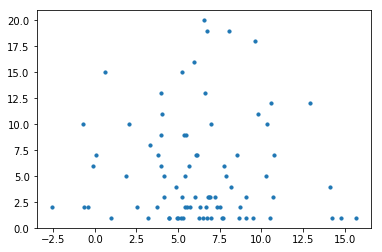

In [96]:
# predictions = mid_fine_model.classify(middata_T)
predictions = mid_fine_model.predict(middata_T)


# print(predictions)

# pred = list(predictions['class'])
pred = predictions

act = list(middata_T['Soluble'])

# pred
# act
# counter=collections.Counter(act)
# print(counter)

# counter=collections.Counter(pred)
# print(counter)
plt.scatter(pred,act,s=10)
plt.show()

In [50]:
# stage2X_train, stage2X_test, stage2Y_train, stage2Y_test = train_test_split(stage2X, stage2Y, test_size=0.2)#, random_state=42)
stage2X_train, stage2X_test, stage2Y_train, stage2Y_test = train_test_split(Syn2X, Syn2Y, test_size=0.2)#, random_state=42)

In [53]:
# from sklearn.utils import class_weight
# cw = class_weight.compute_class_weight('balanced', np.unique(Syn2Y), Syn2Y)
# cw

In [ ]:
# # X = X[:,:100]
# # X[0].shape
# import random
# combined = list(zip(X, Y))
# random.shuffle(combined)

# X[:], Y[:] = zip(*combined)

In [ ]:
# plt.plot(stage2Y_train)
# plt.show()

In [70]:
stage2X_train = np.array(stage2X_train)
stage2Y_train = np.array(stage2Y_train)
stage2X_test = np.array(stage2X_test)
stage2Y_test = np.array(stage2Y_test)

midX_test_nn = np.array(midX)
midY_test_nn = np.array(midY)




stage2X_train = stage2X_train.reshape((stage2X_train.shape[0], 101, ))
stage2Y_train = stage2Y_train.reshape((stage2Y_train.shape[0], ))

stage2X_test = stage2X_test.reshape((stage2X_test.shape[0], 101, ))
stage2Y_test = stage2Y_test.reshape((stage2Y_test.shape[0], ))

In [58]:
model = Sequential()
# model.add(Dense(80,input_dim=101))
model.add(Dense(200, input_dim=101, kernel_initializer='normal', activation='tanh'))
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(1,activation='relu'))

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [ ]:
# The callback function for model checkpoint saving
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,save_best_only=True,\
#                              save_weights_only=True,mode='auto')

# The callback function for earlystopping

earlystop = EarlyStopping(monitor='val_loss',patience=10, \
                          verbose=1, mode='auto')

# The callback function for reducing learning rate on plateus

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001)

In [ ]:
callbacks = [earlystop, reduce_lr]
# callbacks = [checkpoint, reduce_lr]
# opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

In [59]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model_info = model.fit(stage2X_train, stage2Y_train, epochs=1000, batch_size=50, verbose=2,
                       validation_data=(stage2X_test,stage2Y_test))#,class_weight=cw)#,callbacks=callbacks)

Train on 1472 samples, validate on 368 samples
Epoch 1/1000
0s - loss: 112.0432 - acc: 0.0279 - val_loss: 105.7780 - val_acc: 0.0408
Epoch 2/1000
0s - loss: 99.3277 - acc: 0.0360 - val_loss: 98.6991 - val_acc: 0.0380
Epoch 3/1000
0s - loss: 93.0031 - acc: 0.0442 - val_loss: 92.2528 - val_acc: 0.0380
Epoch 4/1000
0s - loss: 88.2765 - acc: 0.0482 - val_loss: 88.6462 - val_acc: 0.0435
Epoch 5/1000
0s - loss: 83.8294 - acc: 0.0489 - val_loss: 84.4020 - val_acc: 0.0598
Epoch 6/1000
0s - loss: 80.2334 - acc: 0.0510 - val_loss: 80.6369 - val_acc: 0.0543
Epoch 7/1000
0s - loss: 76.9055 - acc: 0.0496 - val_loss: 77.5465 - val_acc: 0.0516
Epoch 8/1000
0s - loss: 74.1479 - acc: 0.0489 - val_loss: 74.8707 - val_acc: 0.0543
Epoch 9/1000
0s - loss: 71.6327 - acc: 0.0496 - val_loss: 72.3926 - val_acc: 0.0543
Epoch 10/1000
0s - loss: 69.3062 - acc: 0.0448 - val_loss: 70.1165 - val_acc: 0.0489
Epoch 11/1000
0s - loss: 67.1399 - acc: 0.0503 - val_loss: 67.9747 - val_acc: 0.0462
Epoch 12/1000
0s - loss: 

0s - loss: 6.0619 - acc: 0.2371 - val_loss: 8.9858 - val_acc: 0.2364
Epoch 99/1000
0s - loss: 5.8067 - acc: 0.2317 - val_loss: 8.5859 - val_acc: 0.2418
Epoch 100/1000
0s - loss: 5.7078 - acc: 0.2371 - val_loss: 9.3195 - val_acc: 0.2500
Epoch 101/1000
0s - loss: 5.6849 - acc: 0.2582 - val_loss: 8.5645 - val_acc: 0.2418
Epoch 102/1000
0s - loss: 5.4590 - acc: 0.2507 - val_loss: 8.6061 - val_acc: 0.2364
Epoch 103/1000
0s - loss: 5.9879 - acc: 0.2147 - val_loss: 9.8206 - val_acc: 0.2120
Epoch 104/1000
0s - loss: 5.3922 - acc: 0.2364 - val_loss: 8.2032 - val_acc: 0.2527
Epoch 105/1000
0s - loss: 5.0320 - acc: 0.2636 - val_loss: 8.3469 - val_acc: 0.2446
Epoch 106/1000
0s - loss: 4.7685 - acc: 0.2582 - val_loss: 8.2758 - val_acc: 0.2310
Epoch 107/1000
0s - loss: 4.7771 - acc: 0.2670 - val_loss: 7.6661 - val_acc: 0.2364
Epoch 108/1000
0s - loss: 4.6414 - acc: 0.2690 - val_loss: 7.9896 - val_acc: 0.2717
Epoch 109/1000
0s - loss: 4.3864 - acc: 0.2751 - val_loss: 7.3900 - val_acc: 0.2772
Epoch 11

0s - loss: 1.0465 - acc: 0.4151 - val_loss: 4.4260 - val_acc: 0.4565
Epoch 197/1000
0s - loss: 0.9202 - acc: 0.4273 - val_loss: 4.8087 - val_acc: 0.4592
Epoch 198/1000
0s - loss: 0.8765 - acc: 0.4280 - val_loss: 4.7375 - val_acc: 0.5217
Epoch 199/1000
0s - loss: 0.8063 - acc: 0.4463 - val_loss: 5.0594 - val_acc: 0.5054
Epoch 200/1000
0s - loss: 0.7496 - acc: 0.4586 - val_loss: 4.4095 - val_acc: 0.4647
Epoch 201/1000
0s - loss: 0.7723 - acc: 0.4443 - val_loss: 4.3571 - val_acc: 0.4511
Epoch 202/1000
0s - loss: 0.7588 - acc: 0.4429 - val_loss: 4.4790 - val_acc: 0.4755
Epoch 203/1000
0s - loss: 0.7532 - acc: 0.4579 - val_loss: 4.1945 - val_acc: 0.4973
Epoch 204/1000
0s - loss: 0.7391 - acc: 0.4552 - val_loss: 4.0127 - val_acc: 0.4918
Epoch 205/1000
0s - loss: 0.7266 - acc: 0.4667 - val_loss: 4.4227 - val_acc: 0.5299
Epoch 206/1000
0s - loss: 0.6977 - acc: 0.4789 - val_loss: 4.4021 - val_acc: 0.5245
Epoch 207/1000
0s - loss: 0.7020 - acc: 0.4640 - val_loss: 3.9593 - val_acc: 0.5000
Epoch 2

0s - loss: 0.3192 - acc: 0.6406 - val_loss: 4.0884 - val_acc: 0.6929
Epoch 295/1000
0s - loss: 0.3171 - acc: 0.6535 - val_loss: 3.9313 - val_acc: 0.7038
Epoch 296/1000
0s - loss: 0.3127 - acc: 0.6549 - val_loss: 3.7040 - val_acc: 0.6957
Epoch 297/1000
0s - loss: 0.3145 - acc: 0.6664 - val_loss: 3.7980 - val_acc: 0.7228
Epoch 298/1000
0s - loss: 0.2873 - acc: 0.6726 - val_loss: 3.8243 - val_acc: 0.7527
Epoch 299/1000
0s - loss: 0.3205 - acc: 0.6671 - val_loss: 3.9951 - val_acc: 0.7310
Epoch 300/1000
0s - loss: 0.3123 - acc: 0.6501 - val_loss: 3.8210 - val_acc: 0.7364
Epoch 301/1000
0s - loss: 0.2837 - acc: 0.6678 - val_loss: 3.8330 - val_acc: 0.7364
Epoch 302/1000
0s - loss: 0.3144 - acc: 0.6610 - val_loss: 3.9644 - val_acc: 0.7337
Epoch 303/1000
0s - loss: 0.3376 - acc: 0.6542 - val_loss: 3.5533 - val_acc: 0.7364
Epoch 304/1000
0s - loss: 0.2887 - acc: 0.6726 - val_loss: 3.9341 - val_acc: 0.7310
Epoch 305/1000
0s - loss: 0.2982 - acc: 0.6583 - val_loss: 3.4035 - val_acc: 0.7418
Epoch 3

0s - loss: 0.2037 - acc: 0.7663 - val_loss: 2.8874 - val_acc: 0.7690
Epoch 393/1000
0s - loss: 0.1919 - acc: 0.7765 - val_loss: 3.0546 - val_acc: 0.8071
Epoch 394/1000
0s - loss: 0.1852 - acc: 0.7874 - val_loss: 3.2746 - val_acc: 0.8098
Epoch 395/1000
0s - loss: 0.1771 - acc: 0.7901 - val_loss: 3.3131 - val_acc: 0.8098
Epoch 396/1000
0s - loss: 0.1966 - acc: 0.7765 - val_loss: 3.3411 - val_acc: 0.8016
Epoch 397/1000
0s - loss: 0.1647 - acc: 0.7982 - val_loss: 3.0976 - val_acc: 0.8125
Epoch 398/1000
0s - loss: 0.1702 - acc: 0.7914 - val_loss: 3.3646 - val_acc: 0.8179
Epoch 399/1000
0s - loss: 0.1903 - acc: 0.7765 - val_loss: 3.2571 - val_acc: 0.8152
Epoch 400/1000
0s - loss: 0.3223 - acc: 0.7126 - val_loss: 3.9644 - val_acc: 0.7391
Epoch 401/1000
0s - loss: 0.3016 - acc: 0.7296 - val_loss: 2.5621 - val_acc: 0.7690
Epoch 402/1000
0s - loss: 0.2336 - acc: 0.7425 - val_loss: 3.1511 - val_acc: 0.8043
Epoch 403/1000
0s - loss: 0.2216 - acc: 0.7296 - val_loss: 3.4284 - val_acc: 0.7935
Epoch 4

0s - loss: 0.1454 - acc: 0.8207 - val_loss: 3.7435 - val_acc: 0.8315
Epoch 491/1000
0s - loss: 0.1424 - acc: 0.8288 - val_loss: 3.4749 - val_acc: 0.8315
Epoch 492/1000
0s - loss: 0.1443 - acc: 0.8370 - val_loss: 3.2231 - val_acc: 0.8397
Epoch 493/1000
0s - loss: 0.1401 - acc: 0.8281 - val_loss: 3.3814 - val_acc: 0.8478
Epoch 494/1000
0s - loss: 0.1295 - acc: 0.8437 - val_loss: 3.4860 - val_acc: 0.8315
Epoch 495/1000
0s - loss: 0.1329 - acc: 0.8390 - val_loss: 3.1132 - val_acc: 0.8478
Epoch 496/1000
0s - loss: 0.1357 - acc: 0.8370 - val_loss: 3.1887 - val_acc: 0.8424
Epoch 497/1000
0s - loss: 0.1286 - acc: 0.8601 - val_loss: 3.0005 - val_acc: 0.8424
Epoch 498/1000
0s - loss: 0.1328 - acc: 0.8437 - val_loss: 3.1468 - val_acc: 0.8207
Epoch 499/1000
0s - loss: 0.1271 - acc: 0.8614 - val_loss: 3.1384 - val_acc: 0.8424
Epoch 500/1000
0s - loss: 0.1451 - acc: 0.8288 - val_loss: 3.1074 - val_acc: 0.8342
Epoch 501/1000
0s - loss: 0.1288 - acc: 0.8519 - val_loss: 2.9806 - val_acc: 0.8234
Epoch 5

0s - loss: 0.1178 - acc: 0.8696 - val_loss: 3.8214 - val_acc: 0.8370
Epoch 590/1000
0s - loss: 0.1119 - acc: 0.8743 - val_loss: 3.8952 - val_acc: 0.8261
Epoch 591/1000
0s - loss: 0.1132 - acc: 0.8702 - val_loss: 3.4667 - val_acc: 0.8397
Epoch 592/1000
0s - loss: 0.2056 - acc: 0.8587 - val_loss: 3.4016 - val_acc: 0.7826
Epoch 593/1000
0s - loss: 0.2486 - acc: 0.7677 - val_loss: 3.6163 - val_acc: 0.7989
Epoch 594/1000
0s - loss: 0.1654 - acc: 0.8207 - val_loss: 3.2876 - val_acc: 0.8234
Epoch 595/1000
0s - loss: 0.1316 - acc: 0.8512 - val_loss: 3.4455 - val_acc: 0.8288
Epoch 596/1000
0s - loss: 0.1581 - acc: 0.8519 - val_loss: 3.5799 - val_acc: 0.8261
Epoch 597/1000
0s - loss: 0.1316 - acc: 0.8635 - val_loss: 3.0178 - val_acc: 0.8261
Epoch 598/1000
0s - loss: 0.1222 - acc: 0.8492 - val_loss: 3.2495 - val_acc: 0.8152
Epoch 599/1000
0s - loss: 0.1161 - acc: 0.8743 - val_loss: 3.3533 - val_acc: 0.8342
Epoch 600/1000
0s - loss: 0.1573 - acc: 0.8648 - val_loss: 3.4663 - val_acc: 0.7826
Epoch 6

0s - loss: 0.1070 - acc: 0.8736 - val_loss: 3.0228 - val_acc: 0.8370
Epoch 688/1000
0s - loss: 0.0959 - acc: 0.8974 - val_loss: 3.0684 - val_acc: 0.8234
Epoch 689/1000
0s - loss: 0.0955 - acc: 0.8988 - val_loss: 3.3814 - val_acc: 0.8370
Epoch 690/1000
0s - loss: 0.1011 - acc: 0.9049 - val_loss: 3.4558 - val_acc: 0.8288
Epoch 691/1000
0s - loss: 0.0963 - acc: 0.8899 - val_loss: 3.3512 - val_acc: 0.8342
Epoch 692/1000
0s - loss: 0.0919 - acc: 0.9137 - val_loss: 3.4002 - val_acc: 0.8397
Epoch 693/1000
0s - loss: 0.0938 - acc: 0.9008 - val_loss: 3.1073 - val_acc: 0.8424
Epoch 694/1000
0s - loss: 0.1005 - acc: 0.8906 - val_loss: 3.3571 - val_acc: 0.8261
Epoch 695/1000
0s - loss: 0.0848 - acc: 0.9158 - val_loss: 3.0707 - val_acc: 0.8478
Epoch 696/1000
0s - loss: 0.0894 - acc: 0.9049 - val_loss: 2.8904 - val_acc: 0.8478
Epoch 697/1000
0s - loss: 0.0927 - acc: 0.9090 - val_loss: 2.9560 - val_acc: 0.8424
Epoch 698/1000
0s - loss: 0.0908 - acc: 0.9049 - val_loss: 3.0239 - val_acc: 0.8370
Epoch 6

0s - loss: 0.0917 - acc: 0.9022 - val_loss: 2.8258 - val_acc: 0.8478
Epoch 786/1000
0s - loss: 0.0856 - acc: 0.9062 - val_loss: 2.9164 - val_acc: 0.8505
Epoch 787/1000
0s - loss: 0.0844 - acc: 0.9110 - val_loss: 2.9401 - val_acc: 0.8288
Epoch 788/1000
0s - loss: 0.0897 - acc: 0.9130 - val_loss: 3.0732 - val_acc: 0.8370
Epoch 789/1000
0s - loss: 0.0839 - acc: 0.9076 - val_loss: 2.9270 - val_acc: 0.8397
Epoch 790/1000
0s - loss: 0.0782 - acc: 0.9219 - val_loss: 2.8804 - val_acc: 0.8505
Epoch 791/1000
0s - loss: 0.0846 - acc: 0.9219 - val_loss: 2.9273 - val_acc: 0.8533
Epoch 792/1000
0s - loss: 0.0821 - acc: 0.9083 - val_loss: 2.9438 - val_acc: 0.8533
Epoch 793/1000
0s - loss: 0.0810 - acc: 0.9124 - val_loss: 2.8776 - val_acc: 0.8614
Epoch 794/1000
0s - loss: 0.0842 - acc: 0.9144 - val_loss: 3.0327 - val_acc: 0.8533
Epoch 795/1000
0s - loss: 0.0849 - acc: 0.9124 - val_loss: 3.0357 - val_acc: 0.8451
Epoch 796/1000
0s - loss: 0.0823 - acc: 0.9185 - val_loss: 3.0105 - val_acc: 0.8451
Epoch 7

Epoch 884/1000
0s - loss: 0.0711 - acc: 0.9334 - val_loss: 2.5567 - val_acc: 0.8451
Epoch 885/1000
0s - loss: 0.0645 - acc: 0.9389 - val_loss: 2.5845 - val_acc: 0.8478
Epoch 886/1000
0s - loss: 0.0717 - acc: 0.9226 - val_loss: 2.6877 - val_acc: 0.8478
Epoch 887/1000
0s - loss: 0.0699 - acc: 0.9307 - val_loss: 2.7642 - val_acc: 0.8342
Epoch 888/1000
0s - loss: 0.0745 - acc: 0.9334 - val_loss: 3.1721 - val_acc: 0.8451
Epoch 889/1000
0s - loss: 0.0758 - acc: 0.9232 - val_loss: 2.9885 - val_acc: 0.8424
Epoch 890/1000
0s - loss: 0.0751 - acc: 0.9273 - val_loss: 3.0866 - val_acc: 0.8370
Epoch 891/1000
0s - loss: 0.0821 - acc: 0.9144 - val_loss: 2.9125 - val_acc: 0.8560
Epoch 892/1000
0s - loss: 0.0708 - acc: 0.9314 - val_loss: 2.7141 - val_acc: 0.8451
Epoch 893/1000
0s - loss: 0.0823 - acc: 0.9192 - val_loss: 2.7763 - val_acc: 0.8587
Epoch 894/1000
0s - loss: 0.0778 - acc: 0.9321 - val_loss: 2.8511 - val_acc: 0.8424
Epoch 895/1000
0s - loss: 0.0784 - acc: 0.9266 - val_loss: 3.0025 - val_acc:

0s - loss: 0.0635 - acc: 0.9423 - val_loss: 3.0860 - val_acc: 0.8587
Epoch 983/1000
0s - loss: 0.0687 - acc: 0.9280 - val_loss: 3.0713 - val_acc: 0.8533
Epoch 984/1000
0s - loss: 0.0762 - acc: 0.9368 - val_loss: 3.0628 - val_acc: 0.8505
Epoch 985/1000
0s - loss: 0.0620 - acc: 0.9436 - val_loss: 3.0287 - val_acc: 0.8560
Epoch 986/1000
0s - loss: 0.0705 - acc: 0.9355 - val_loss: 3.0887 - val_acc: 0.8533
Epoch 987/1000
0s - loss: 0.0668 - acc: 0.9389 - val_loss: 3.0149 - val_acc: 0.8560
Epoch 988/1000
0s - loss: 0.0688 - acc: 0.9416 - val_loss: 2.9345 - val_acc: 0.8560
Epoch 989/1000
0s - loss: 0.0726 - acc: 0.9321 - val_loss: 2.8990 - val_acc: 0.8696
Epoch 990/1000
0s - loss: 0.0720 - acc: 0.9321 - val_loss: 2.9091 - val_acc: 0.8451
Epoch 991/1000
0s - loss: 0.0606 - acc: 0.9484 - val_loss: 3.1492 - val_acc: 0.8560
Epoch 992/1000
0s - loss: 0.0622 - acc: 0.9436 - val_loss: 3.1874 - val_acc: 0.8587
Epoch 993/1000
0s - loss: 0.0629 - acc: 0.9477 - val_loss: 3.1308 - val_acc: 0.8560
Epoch 9

In [ ]:
stage2X_train.shape, stage2Y_train.shape, stage2X_test.shape,stage2Y_test.shape

In [ ]:
max(stage2Y_train), max(stage2Y_test)

In [61]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

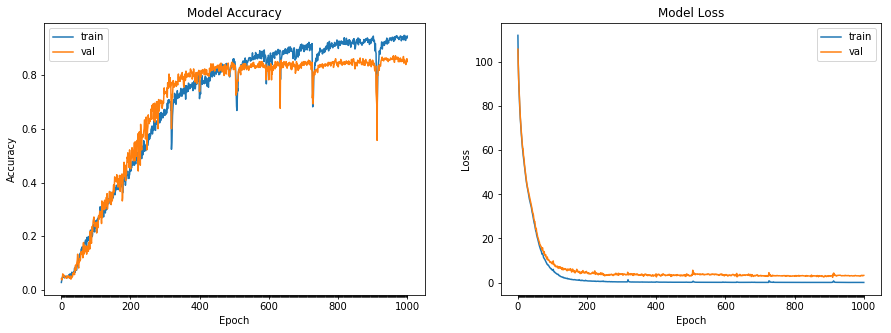

In [62]:
plot_model_history(model_info)

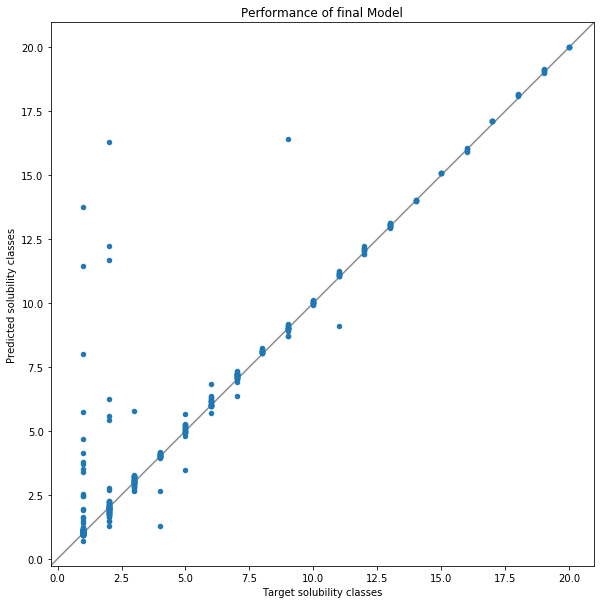

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
# ax.scatter(np.asarray(newY_train),np.round(model.predict(np.asarray(newX_train))), s= 10)
ax.scatter(midY_test_nn,model.predict(midX_test_nn), s= 20)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [ ]:
Y_train_predict = model.predict(X_train)
Y_train_predict.shape

In [ ]:
Y_train_predict=np.reshape(Y_train_predict,(2598,))

In [ ]:
Y_test_predict = model.predict(X_test)
Y_test_predict.shape

In [ ]:
Y_test_predict=np.reshape(Y_test_predict,(650,))

In [ ]:
dif = np.subtract(Y_train,Y_train_predict)
tbd = []
for i in range(len(dif)):
    d = dif[i]
    if abs(d)>3:
        tbd.append(i)
        
newX_train=[]
newY_train = []
for i in range(len(X_train)):
    if i not in tbd:
        newX_train.append(X_train[i])
        newY_train.append(Y_train[i])
        
len(newX_train)

In [ ]:
dif = np.subtract(Y_test,Y_test_predict)
tbd = []
for i in range(len(dif)):
    d = dif[i]
    if (Y_test[i]==0 and Y_test_predict[i]>0) or (Y_test[i]>0 and Y_test_predict[i]==0) or abs(d)>12:
        tbd.append(i)
        

newX_test=[]
newY_test = []
for i in range(len(X_test)):
    if i not in tbd:
        newX_test.append(X_test[i])
        newY_test.append(Y_test[i])

len(newY_test)

In [ ]:
np.asarray(newX_train).tofile('X_train.csv')
np.asarray(newY_train).tofile('Y_train.csv')
np.asarray(newX_test).tofile('X_test.csv')
np.asarray(newY_test).tofile('Y_test.csv')

In [ ]:
newX = []
newX.extend(newX_train)
newX.extend(newX_test)

newY = []
newY.extend(newY_train)
newY.extend(newY_test)

np.save('newX.npy',np.asarray(newX))
np.save('newY.npy',np.asarray(newY))
np.save('newX_train.npy',np.asarray(newX_train))
np.save('newY_train.npy',np.asarray(newY_train))
np.save('newX_test.npy',np.asarray(newX_test))
np.save('newY_test.npy',np.asarray(newY_test))

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(newY_test, np.round(model.predict(newX_test)))

In [ ]:
print(np.round(model.predict([val_data_lstm,val_data_mw])))

In [ ]:
mse*19/200

In [ ]:
(19/200)*3

In [ ]:
mean_squared_error(target,np.round(model.predict([data_lstm,data_mw])))*19/200

In [ ]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(newY_test, np.round(model.predict(newX_test)),average='weighted')